<a href="https://colab.research.google.com/github/JoungMinJu/lab_study/blob/main/%ED%95%A8%EC%88%98%ED%98%95_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#케라스 
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
t=Tokenizer()
fit_text="The earth is an awesome place live"
t.fit_on_texts([fit_text])

test_text="The earth is an great place live"
sequences=t.texts_to_sequences([test_text])[0]

print("Sequences :", sequences)
print("word_index :", t.word_index)

Sequences : [1, 2, 3, 4, 6, 7]
word_index : {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [10]:
#모든 샘플의 길이 맞추기 _ 패딩 작업(보통 숫자 0을 넣는다)
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1,2,3],[3,4,5,6],[7,8]],maxlen=3, padding='pre')
#maxlen= 모든 데이터에 대해 정규화 할 길이 padding='pre'는 앞에 0 채우겠다. post는 뒤ㅔㅇ 0 채우겠다.ㅡ

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

In [ ]:
#워드 임베딩 = 텍스트 내의 단어들을 밀집벡터로 만드는 것.
#대부분이 0인 벡터를 희소벡터라고하고 반대가 밀집벡터임9

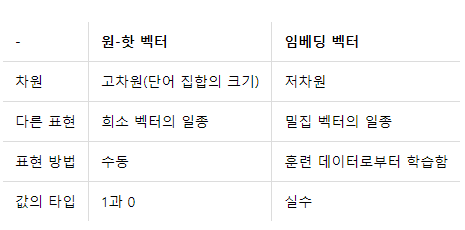![image.png](
  
)

In [ ]:
#밀집벡터 = 차원을 원핫벡터와 같이 단어 집합의 크기로 상정하지 않고 사용자가 설정한 값으로 모든 단어의 벡터 표현ㅇ의 차원을 맞춰준다.


In [ ]:
#단어를 밀집 벡터로 만드는 작업 =워드 임베딩


Embedding() : Embedding()은 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다. Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행합니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.

아래의 코드는 실제 동작되는 코드가 아니라 의사 코드(pseudo-code)로 임베딩의 개념 이해를 돕기 위해서 작성되었습니다.

위의 코드에서 Dense()는 한번 사용되었지만 더 많은 층을 추가할 수 있습니다. Dense()의 대표적인 인자를 보겠습니다.

첫번째 인자 = 출력 뉴런의 수.
input_dim = 입력 뉴런의 수. (입력의 차원)
activation = 활성화 함수.
- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
- sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.

optimizer : 훈련 과정을 설정하는 옵티마이저를 설정합니다. 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있습니다.
loss : 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
metrics : 훈련을 모니터링하기 위한 지표를 선택합니다.

대표적으로 사용되는 손실 함수와 활성화 함수의 조합은 아래와 같습니다. 더 많은 함수는 케라스 공식문서에서 확인 가능합니다.

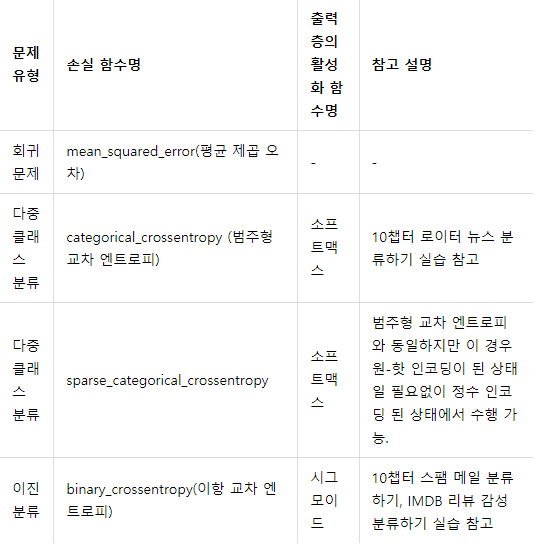

케라스의 함수형 API

In [18]:
#Sequential은 여러층을 공유하거나 다양한 종류의 입출력을 사용하는 등의 복잡한 모델 제작엔 한계가 있다
#복잡한 모델 생성할 수 있는 방식인 함수형 API사용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

#function api에서는 입력 데이터의 크기를 인자로 입력층을 정의해주어야한다.

In [23]:
#입력의 차원이 1인 전결합 피드 포워드 신경망
inputs=Input(shape=(10,)) #텐서를 리턴하는 입력층
hidden1=Dense(64,activation='relu')(inputs)
hidden2=Dense(64,activation='relu')(hidden1)
output=Dense(64,activation='relu')(hidden2)

#이를  model로 저장하면  model.compile, model.fit 등을 사용가능

In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


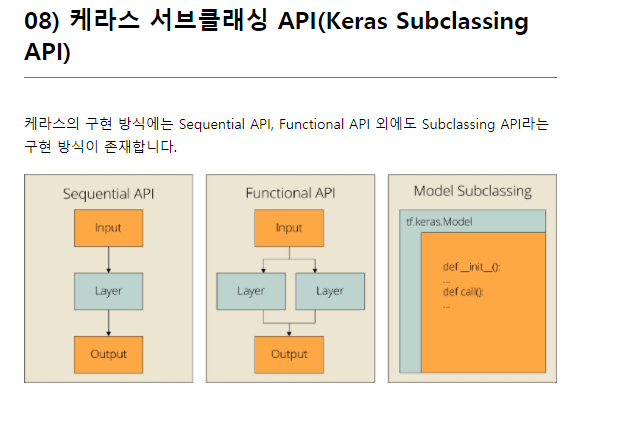

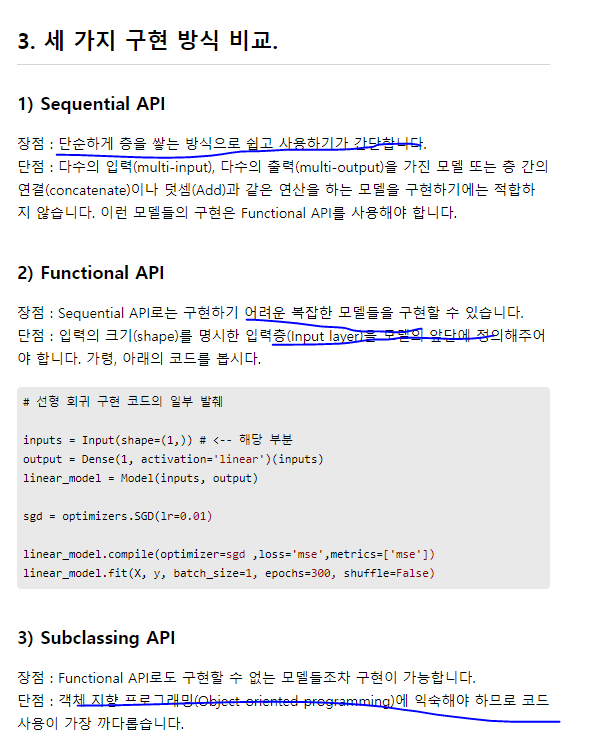

In [26]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

newsdata=fetch_20newsgroups(subset='train') #훈련데이터만 리턴
print(newsdata.keys())


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [27]:
print("훈련용 샘플 개수 : {}".format(len(newsdata.datama)))

훈련용 샘플 개수 : 11314


In [28]:
#샘플 11,314개 주제는 20개
print('총 주제의 개수 :  {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 :  20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [29]:
print("첫번째 샘플의 레이블 : {}".format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [30]:
print("7번 레이블이 의미하는 주제 : ",newsdata.target_names[7])

7번 레이블이 의미하는 주제 :  rec.autos


In [31]:
#첫번째 샘플의 본문내용
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [32]:
data=pd.DataFrame(newsdata.data, columns=['email'])
data['target']=pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [34]:
data.isnull().values.any()
#널값 없음


False

In [35]:
print("중복을 제외한 샘플의 수 : ", data['email'].nunique())
print("중복을 제외한 주제의 수 : ",data['target'].nunique())

중복을 제외한 샘플의 수 :  11314
중복을 제외한 주제의 수 :  20


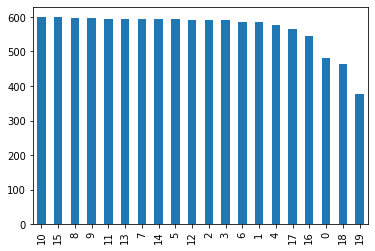

In [36]:
data['target'].value_counts().plot(kind='bar')


In [37]:
#각 레이블이 몇 개 있는지
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [39]:
#데이터 프레임으로부터 메일 본문과 레이블을 분리하고 테스트 데이터 불러오기
newsdata_test=fetch_20newsgroups(subset='test',shuffle=True)
train_email=data['email']
train_label=data['target']
test_email=newsdata_test.data
test_label=newsdata_test.target

In [43]:
#토크나이저 이용한 전처리
max_words=10000 #실습에 사용할 단어의 최대 개수
num_classes=20 #레이블의 수

In [44]:
def prepare_data(train_data, test_data, mode):
  t=Tokenizer(num_words=max_words)
  t.fit_on_texts(train_data)
  x_train=t.texts_to_matrix(train_data, mode=mode) #샘플수 *max_words 크기의 행렬 생성
  x_test=t.texts_to_matrix(test_data, mode=mode)
  return x_train, x_test, t.index_word

In [45]:
x_train, x_test, index_to_word=prepare_data(train_email, test_email, 'binary')
y_train=to_categorical(train_label, num_classes)
y_test=to_categorical(test_label, num_classes)

In [46]:
print("훈련 샘플 본문의 크기 :  ", x_train.shape)
print("훈련 샘플 레이블의 크기 :", y_train.shape)
print("테스트 샘플 본문의 크기 ;",x_test.shape)
print("테스트 샘플 레이아웃 크기 : ",y_test.shape)

훈련 샘플 본문의 크기 :   (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 ; (7532, 10000)
테스트 샘플 레이아웃 크기 :  (7532, 20)


In [47]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [48]:
# 다층 퍼셉트로을 사용해 텍스트 분류
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [49]:
def fit_and_evaluate(x_train, y_train, x_test, y_test):
  model=Sequential()
  model.add(Dense(256, input_shape=(max_words,),activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
  score=model.evaluate(x_test, y_test, batch_size=128, verbose=0)
  return score[1]

In [50]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 33ms/step - loss: 2.2548 - accuracy: 0.3490 - val_loss: 0.9305 - val_accuracy: 0.8004
Epoch 2/5
80/80 [==============================] - 2s 31ms/step - loss: 0.8581 - accuracy: 0.7636 - val_loss: 0.4653 - val_accuracy: 0.8772
Epoch 3/5
80/80 [==============================] - 3s 31ms/step - loss: 0.4310 - accuracy: 0.8837 - val_loss: 0.3630 - val_accuracy: 0.8993
Epoch 4/5
80/80 [==============================] - 2s 31ms/step - loss: 0.2623 - accuracy: 0.9348 - val_loss: 0.3184 - val_accuracy: 0.9081
Epoch 5/5
80/80 [==============================] - 2s 31ms/step - loss: 0.1734 - accuracy: 0.9572 - val_loss: 0.2955 - val_accuracy: 0.9152
binary 모드의 테스트 정확도: 0.8281996846199036
Epoch 1/5
80/80 [==============================] - 3s 33ms/step - loss: 2.7350 - accuracy: 0.2515 - val_loss: 1.6030 - val_accuracy: 0.7261
Epoch 2/5
80/80 [==============================] - 3s 34ms/step - loss: 1.3804 - accuracy: 0.6406 - val_loss: 0.6952 - va